# Assignment # 01: Data Preprocessing and Visualization

# **Name: Muhammad Deedahwar Mazhar Qureshi**
# **CMS ID: 243516**
# **3/28/2021**

# CS471: Machine Learning
### BESE-9 AB
### Instructors: Dr Omar Arif
#### Due Date: March 28, 2021

### Introduction

The Novel Coronavirus (COVID19) which causes respiratory illnesss was first detected in Wuhan, China. Since the disease is contagious, it has spread all over the world due to the high number of tourism and business visits to / from China. As you all are very well aware, COVID19 has been labelled as a global pandemic now by World Health Organization. 
Scientists all over the world are trying to drive insights from the datasets to come up with a possible prediction which will help with estimating the spread, and the virus frequency and duration. 
Johns Hopkins University has made an excellent dashboard using the affected cases data. The dataset is made available at Kaggle and can be downloaded for the purpose of research.
For this assignment, we will use the Kaggle COVID-19 dataset (Download here: <a href="https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset" title="DATASET">DATASET</a>) and will try to learn some insights using the power of Machine Learning.
The Johns Hopkins University's web based dashboard can be accessed here:
<a href="https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6" title="Web Dashboard">Web Dashboard</a>

#### Question # 01

As you must have noticed, there are 6 files in the data you have downloaded from Kaggle.
For this question, we will use the main file `covid_19_data.csv`.
The steps to follow are given:
1. Read the data file and examine the features
2. Since the dataset is a bit sparse, clean the dataset by dropping rows which have missing points.
3. Print the initial 10 rows of the data.

Note: Please use Pandas

In [3]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np



In [4]:

data_set = pd.read_csv("/content/covid_19_data.csv" ).drop("SNo", axis=1)
data_set= data_set[data_set["Province/State"]!="Recovered"]

data_set.head(10)






,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


#### Question # 02

1. Rank the countries in the dataset in descending order according to the number of deaths.
2. Figure out the most affected provinces/states in top 3 countries with most number of Deaths.
3. Repeat the first two steps for Recovered and Confirmed cases as well.
4. Plot a bar graph for top 10 states in China and US in accordance to the death cases, and recovered cases.

In [5]:



data_set1= data_set.groupby("Country/Region").sum().sort_values(by="Deaths", ascending=False)
data_set1["Rank"]=data_set1["Deaths"].rank(ascending=False)
data_set1



,Confirmed,Deaths,Recovered,Rank
Country/Region,,,,
US,2.033062e+09,51957981.0,7.930000e+02,1.0
Brazil,1.002497e+09,29881323.0,8.538723e+08,2.0
India,1.229911e+09,19276150.0,1.091544e+09,3.0
Mexico,1.700602e+08,16858768.0,1.335130e+08,4.0
UK,2.152292e+08,12822085.0,6.418290e+05,5.0
...,...,...,...,...
Marshall Islands,2.640000e+02,0.0,1.920000e+02,205.0
Macau,1.407900e+04,0.0,1.271500e+04,205.0
"('St. Martin',)",2.000000e+00,0.0,0.000000e+00,205.0


In [6]:
array=["US", "India", "Brazil"]
selected_data=data_set[data_set["Country/Region"].isin(array)]
data_set1= selected_data.groupby(["Country/Region","Province/State"]).sum().sort_values(by="Deaths", ascending=False)
data_set1.reset_index().drop_duplicates(subset=["Country/Region"]).head(3)



,Country/Region,Province/State,Confirmed,Deaths,Recovered
0,US,New York,141008297.0,8935584.0,0.0
1,Brazil,Sao Paulo,199020921.0,7260376.0,162565479.0
2,India,Maharashtra,250298655.0,6862949.0,214156325.0


In [7]:
data_set1= data_set.groupby("Country/Region").sum().sort_values(by="Confirmed", ascending=False)
data_set1

,Confirmed,Deaths,Recovered
Country/Region,,,
US,2.033062e+09,51957981.0,7.930000e+02
India,1.229911e+09,19276150.0,1.091544e+09
Brazil,1.002497e+09,29881323.0,8.538723e+08
Russia,3.404196e+08,5790425.0,2.581808e+08
France,2.510855e+08,10293457.0,2.947512e+07
...,...,...,...
North Ireland,1.000000e+00,0.0,0.000000e+00
Cape Verde,1.000000e+00,0.0,0.000000e+00
The Gambia,1.000000e+00,0.0,0.000000e+00


In [8]:
array=["US", "India", "Brazil"]
selected_data=data_set[data_set["Country/Region"].isin(array)]
data_set1= selected_data.groupby(["Country/Region","Province/State"]).sum().sort_values(by="Confirmed", ascending=False)
data_set1.reset_index().drop_duplicates(subset=["Country/Region"]).head(3)

,Country/Region,Province/State,Confirmed,Deaths,Recovered
0,India,Maharashtra,250298655.0,6862949.0,214156325.0
1,US,California,212873666.0,3467311.0,40.0
2,Brazil,Sao Paulo,199020921.0,7260376.0,162565479.0


In [9]:
data_set1= data_set.groupby("Country/Region").sum().sort_values(by="Recovered", ascending=False)
data_set1

,Confirmed,Deaths,Recovered
Country/Region,,,
India,1.229911e+09,19276150.0,1.091544e+09
Brazil,1.002497e+09,29881323.0,8.538723e+08
Russia,3.404196e+08,5790425.0,2.581808e+08
Colombia,1.796055e+08,5221591.0,1.530427e+08
Argentina,1.738462e+08,4466541.0,1.437954e+08
...,...,...,...
Puerto Rico,3.000000e+00,0.0,0.000000e+00
Republic of Ireland,2.100000e+01,0.0,0.000000e+00
Republic of the Congo,1.000000e+00,0.0,0.000000e+00


In [10]:
array=["Russia", "India", "Brazil"]
selected_data=data_set[data_set["Country/Region"].isin(array)]
data_set1= selected_data.groupby(["Country/Region","Province/State"]).sum().sort_values(by="Recovered", ascending=False).drop_duplicates()
data_set1.reset_index().drop_duplicates(subset=["Country/Region"]).head(3)

,Country/Region,Province/State,Confirmed,Deaths,Recovered
0,India,Maharashtra,250298655.0,6862949.0,214156325.0
1,Brazil,Sao Paulo,199020921.0,7260376.0,162565479.0
5,Russia,Moscow,89746641.0,1419417.0,68056445.0


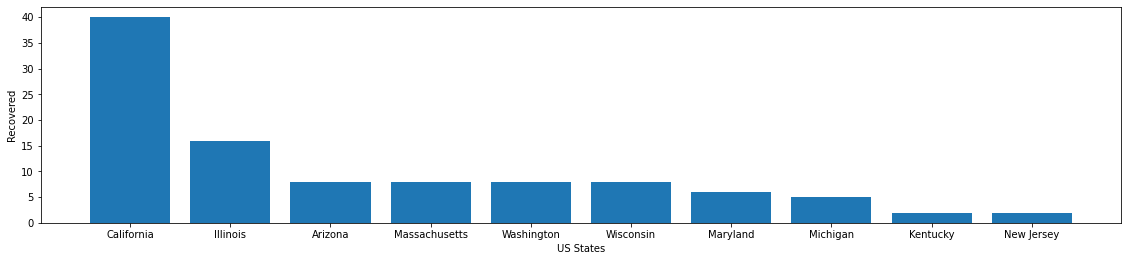

In [35]:
#Data is distorted as cities are also included in Provinces/States dataset, so first getting the top 10 stats and adding them to an array to mark data.
states_us=["California", "Illinois","Massachusetts", "Washington", "Arizona", "Wisconsin", "Maryland", "Michigan", "New Jersey", "Kentucky"]
data_set1=data_set[data_set["Country/Region"]=="US"]
data_set1=data_set1[data_set1["Province/State"].isin(states_us)]
data_set1=data_set1.groupby(["Country/Region","Province/State"]).sum().sort_values(by="Recovered", ascending=False)
data_set1=data_set1.reset_index().head(10)
fig=plt.figure(figsize=(15, 3))
ax=fig.add_axes([0,0,1,1])
ax.set_xlabel("US States")
ax.set_ylabel("Recovered")
states=data_set1["Province/State"]
recovered=data_set1["Recovered"]
ax.bar(states, recovered)
plt.show()
#data_set1


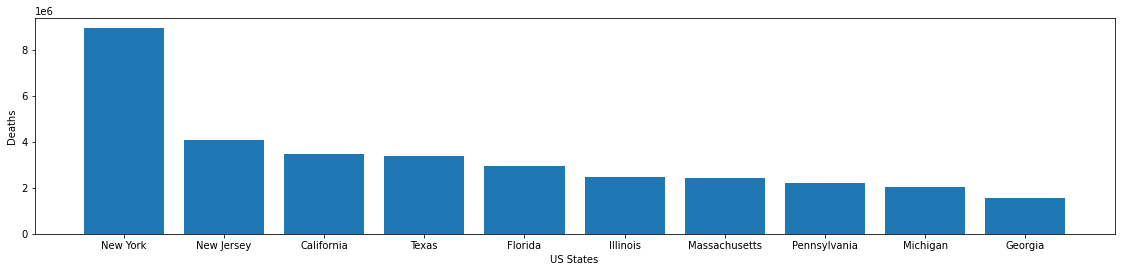

In [18]:
data_set1=data_set[data_set["Country/Region"]=="US"]
data_set1=data_set1[data_set1["Province/State"]!="US"]
data_set1=data_set1.groupby(["Country/Region","Province/State"]).sum().sort_values(by="Deaths", ascending=False)
data_set1=data_set1.reset_index().head(10)
fig=plt.figure(figsize=(15, 3))
ax=fig.add_axes([0,0,1,1])
ax.set_xlabel("US States")
ax.set_ylabel("Deaths")
states=data_set1["Province/State"]
deaths=data_set1["Deaths"]
ax.bar(states, deaths)
plt.show()

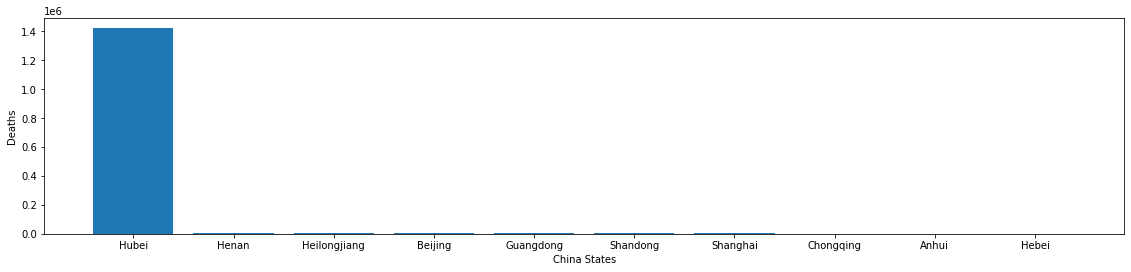

In [13]:
data_set1=data_set[data_set["Country/Region"]=="Mainland China"]
data_set1=data_set1[data_set1["Province/State"]!="Mainland China"]
data_set1=data_set1.groupby(["Country/Region","Province/State"]).sum().sort_values(by="Deaths", ascending=False)
data_set1=data_set1.reset_index().head(10)
fig=plt.figure(figsize=(15, 3))
ax=fig.add_axes([0,0,1,1])
ax.set_xlabel("China States")
ax.set_ylabel("Deaths")
states=data_set1["Province/State"]
deaths=data_set1["Deaths"]
ax.bar(states, deaths)
plt.show()

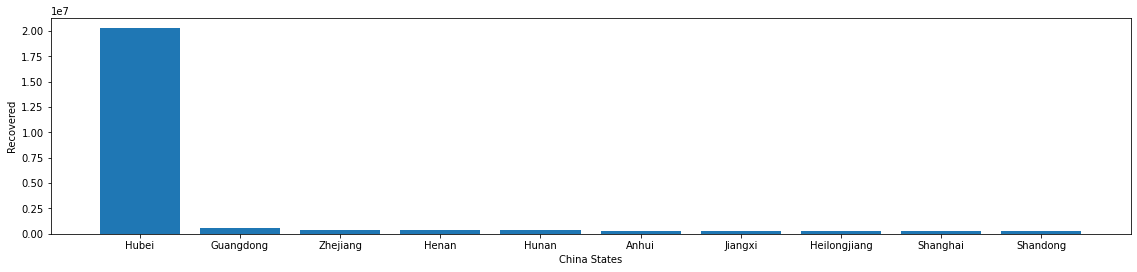

In [16]:
data_set1=data_set[data_set["Country/Region"]=="Mainland China"]
data_set1=data_set1[data_set1["Province/State"]!="Mainland China"]
data_set1=data_set1.groupby(["Country/Region","Province/State"]).sum().sort_values(by="Recovered", ascending=False)
data_set1=data_set1.reset_index().head(10)
fig=plt.figure(figsize=(15, 3))
ax=fig.add_axes([0,0,1,1])
ax.set_xlabel("China States")
ax.set_ylabel("Recovered")
states=data_set1["Province/State"]
recovered=data_set1["Recovered"]
ax.bar(states, recovered)
plt.show()

#### Question # 03

Since we have dates in the data, let's quantify out how the virus has spread over time and which areas are most affected by the virus. This will help us figure out if the situation is getting any better over time or not.

1. Plot the confirmed, deaths and recovered cases as line graphs with dates for US, Iran and China each.
2. Looking at the plots, explain which country has seen a surge in confirmed, and death cases?
3. Work out the death rate due to COVID-19 in these three countries.
4. By examining the plots, which country has been able to efficiently and swiftly recover the confirmed cases? Work out the recovery rate for each country (US, Iran and China) and then answer the question?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


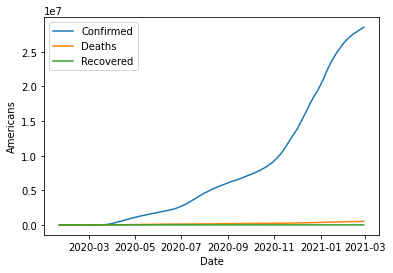

In [70]:
US_data=data_set[data_set["Country/Region"]=="US"]
US_data["ObservationDate"]=pd.to_datetime(US_data["ObservationDate"])
US_data=US_data.groupby(["ObservationDate","Country/Region"]).sum()
US_data= US_data.reset_index().sort_values(by="ObservationDate", ascending=True)

plt.plot(US_data["ObservationDate"], US_data["Confirmed"], label="Confirmed")
plt.plot(US_data["ObservationDate"], US_data["Deaths"], label="Deaths")
plt.plot(US_data["ObservationDate"], US_data["Recovered"], label="Recovered")
plt.xlabel("Date")
plt.ylabel("Americans")
plt.legend()
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


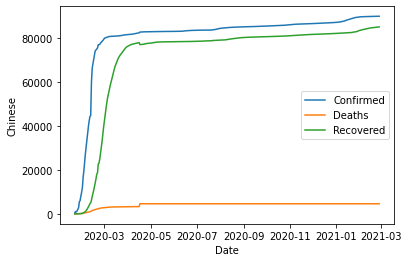

In [72]:
China_data=data_set[data_set["Country/Region"]=="Mainland China"]
China_data["ObservationDate"]=pd.to_datetime(China_data["ObservationDate"])
China_data=China_data.groupby(["ObservationDate","Country/Region"]).sum()
China_data= China_data.reset_index().sort_values(by="ObservationDate", ascending=True)

plt.plot(China_data["ObservationDate"], China_data["Confirmed"], label="Confirmed")
plt.plot(China_data["ObservationDate"], China_data["Deaths"], label="Deaths")
plt.plot(China_data["ObservationDate"], China_data["Recovered"], label="Recovered")
plt.xlabel("Date")
plt.ylabel("Chinese")
plt.legend()
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


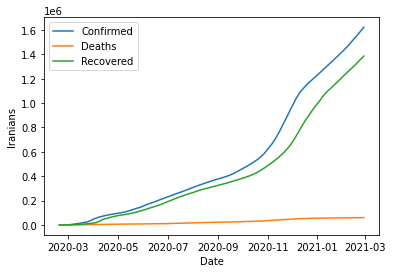

In [75]:

Iran_data=data_set[data_set["Country/Region"]=="Iran"]
Iran_data["ObservationDate"]=pd.to_datetime(Iran_data["ObservationDate"])
Iran_data=Iran_data.groupby(["ObservationDate","Country/Region"]).sum()
Iran_data= Iran_data.reset_index().sort_values(by="ObservationDate", ascending=True)

plt.plot(Iran_data["ObservationDate"], Iran_data["Confirmed"], label="Confirmed")
plt.plot(Iran_data["ObservationDate"], Iran_data["Deaths"], label="Deaths")
plt.plot(Iran_data["ObservationDate"], Iran_data["Recovered"], label="Recovered")
plt.xlabel("Date")
plt.ylabel("Iranians")
plt.legend()
plt.show()


2. China has seen a huge surge in confirmed and recovery cases.

In [76]:
print("Death Rate for US: ", (US_data.sum()["Deaths"]/US_data.sum()["Confirmed"])*100)
print("Death Rate for China: ", (China_data.sum()["Deaths"]/China_data.sum()["Confirmed"])*100)
print("Death Rate for Iran: ", (Iran_data.sum()["Deaths"]/Iran_data.sum()["Confirmed"])*100)

Death Rate for US:  2.256059600988915
Death Rate for China:  5.117914360211766
Death Rate for Iran:  4.785959248957057


3. China has the highest death rate among all 3 nations.

In [77]:

print("Recovery Rate for US: ", (US_data.sum()["Recovered"]/US_data.sum()["Confirmed"])*100)
print("Recovery Rate for China: ", (China_data.sum()["Recovered"]/China_data.sum()["Confirmed"])*100)
print("Recovery Rate for Iran: ", (Iran_data.sum()["Recovered"]/Iran_data.sum()["Confirmed"])*100)

Recovery Rate for US:  2.477125393204453e-05
Recovery Rate for China:  89.3218173438372
Recovery Rate for Iran:  80.83549143604606


4. China has by far been the most successful country in dealing with COVID-19 as the stats show.

4.China has a much higher recovery rate.

#### Question # 04

In this question, we will look at another data file namely `time_series_covid_19_deaths.csv`.
In this file, time series data of death occurred due to COVID-19 in countries/states/provinces is given.

1. Read the file and examine the features.
2. Clean the dataset by dropping missing rows with data points.
3. Since you already have information for States/Provinces in US, and China with most deaths, you can use those States/Provinces and plot the number of deaths against each of the top 5 states in both China and US.

In [78]:
data_set = pd.read_csv("/content/time_series_covid_19_deaths.csv" )

data_set= data_set[data_set["Long"]!=0]
data_set=data_set[data_set["Lat"]!=0]
data_set_for_US= pd.read_csv("/content/time_series_covid_19_deaths_US.csv" )
data_set

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2346,2354,2363,2370,2373,2378,2385,2389,2389,2397,2399,2400,2400,2404,2405,2406,2407,2407,2408,2410,2413,2414,2418,2419,2424,2427,2427,2427,2428,2428,2430,2430,2430,2432,2433,2435,2436,2438,2442,2443
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1287,1291,1296,1303,1310,1315,1324,1332,1339,1350,1358,1369,1380,1393,1398,1404,1418,1433,1446,1460,1472,1488,1503,1517,1531,1543,1555,1567,1582,1600,1617,1636,1653,1666,1681,1696,1715,1736,1756,1775
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2843,2849,2853,2856,2861,2863,2866,2871,2877,2881,2884,2888,2891,2894,2898,2900,2904,2909,2909,2914,2918,2924,2926,2930,2932,2935,2939,2943,2945,2947,2950,2954,2958,2961,2964,2967,2970,2973,2977,2979
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,92,92,93,93,96,96,97,97,98,100,100,101,101,101,102,103,103,104,105,106,106,106,106,106,106,107,107,107,107,107,107,107,107,107,109,110,110,110,110,110
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,442,444,448,452,457,459,461,462,462,464,464,464,466,466,468,470,473,474,475,475,475,478,487,487,490,491,492,493,494,496,498,498,498,499,499,500,501,502,504,506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
270,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1741,1751,1757,1769,1783,1791,1796,1803,1808,1812,1823,1831,1833,1840,1849,1857,1865,1867,1870,1881,1888,1897,1909,1910,1918,1930,1933,1936,1942,1948,1956,1961,1971,1976,1986,1994,1999,2008,2019,2025
271,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,612,612,614,614,615,615,615,615,615,615,615,615,615,615,615,615,615,615,615,615,615,615,616,616,616,616,617,617,618,618,618,618,618,619,619,620,624,625,627,631
272,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,578,585,597,610,627,639,660,672,688,705,728,745,763,780,794,804,812,828,839,853,869,881,901,914,931,940,951,959,974,983,991,1002,1016,1020,1031,1040,1051,1059,1066,1081


In [79]:
China_states=["Hubei", "Henan", "Heilongjiang", "Beijing", "Guangdong"]
US_states=["New York", "California", "Texas", "New Jersey", "Florida"]
US_data=data_set_for_US[data_set_for_US["Province_State"].isin(US_states)]
US_data=US_data.groupby("Province_State").sum()
China_data=data_set[data_set["Province/State"].isin(China_states)]

China_data=China_data.drop(["Country/Region", "Lat", "Long"], axis=1)
US_data.reset_index()
US_data=US_data.drop(["UID","code3", "FIPS", "Lat", "Long_", "Population"], axis=1)
China_data.reset_index()
US_data=US_data.reset_index()
US_data

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21
0,California,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,34441,35060,35796,36362,36846,37121,37543,38268,38817,39574,40238,40702,40928,41402,41902,42484,43120,43690,43991,44155,44494,45009,45496,46022,46466,46874,47057,47119,47510,47936,48259,48836,49120,49345,49541,49888,50972,51395,51794,51953
1,Florida,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24436,24578,24739,25011,25164,25293,25446,25673,25833,26035,26254,26360,26479,26685,26822,27019,27247,27457,27599,27696,27815,28048,28208,28382,28565,28683,28779,28934,29154,29311,29474,29692,29813,29906,30065,30213,30340,30478,30624,30734
2,New Jersey,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20512,20664,20760,20875,20934,20951,20972,21105,21220,21301,21383,21455,21484,21513,21584,21693,21793,21886,21964,21989,22011,22103,22250,22329,22393,22440,22454,22466,22497,22632,22721,22784,22834,22858,22874,22978,23077,23147,23192,23238
3,New York,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,41368,41587,41787,41974,42134,42325,42544,42726,42887,43093,43278,43453,43634,43805,43982,44148,44298,44466,44664,44839,44969,45140,45312,45453,45597,45751,45884,46000,46141,46267,46436,46593,46703,46812,46924,47037,47156,47264,47389,47498
4,Texas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,33032,33491,33942,34381,34725,34911,35090,35420,35877,36292,36650,36924,37074,37245,37619,38039,38453,38893,39182,39322,39482,39799,40148,40535,40901,41149,41273,41336,41386,41496,41630,41832,42041,42162,42301,42521,42831,43085,43376,43519


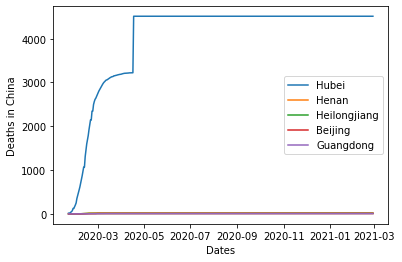

In [80]:
for i in range(0, len(China_states)):
  state_data= China_data[China_data["Province/State"]==China_states[i]]
  state_data=state_data.drop(["Province/State"],axis=1)
  state_data=state_data.T
  
  state_data.index=pd.to_datetime(state_data.index)
  plt.plot(state_data.index, state_data, label=China_states[i])

plt.xlabel("Dates")
plt.ylabel("Deaths in China")
plt.legend()
plt.show()



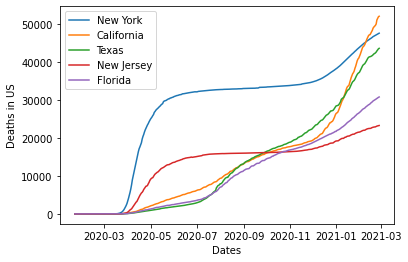

In [81]:
for i in range(0, len(US_states)):
  state_data= US_data[US_data["Province_State"]==US_states[i]]
  state_data=state_data.drop(["Province_State"],axis=1)
  state_data=state_data.T
  
  state_data.index=pd.to_datetime(state_data.index)
  plt.plot(state_data.index, state_data, label=US_states[i])

plt.xlabel("Dates")
plt.ylabel("Deaths in US")
plt.legend()
plt.show()

#### Question # 05

This aspect is interesting since we would get to work with Geographical Plots. You have the latitude and longitude data from the `time_series_covid_19_deaths.csv` data file. You will use that for this question.

We will use BaseMap library to plot the latitude and longitude points on the world map.
You can download BaseMap by running the following command in your terminal/command line prompt: 
```
pip3 install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz
```

1. Once you have it installed, load up a basic world map and plot the values.
2. By visually examining, answer in which countries, the points scatter the most?

For reference and working directions with Basemap, you may take help from this video tutorial: <a href="https://www.youtube.com/watch?time_continue=114&v=XiZbrii49pI&feature=emb_title" BASEMAP >BASEMAP TUTORIAL</a>

In [2]:
!pip install -q https://github.com/matplotlib/basemap/archive/master.zip

     - 148.9MB 1.2MB/s
     |████████████████████████████████| 6.5MB 5.3MB/s 
     |████████████████████████████████| 225kB 54.3MB/s 


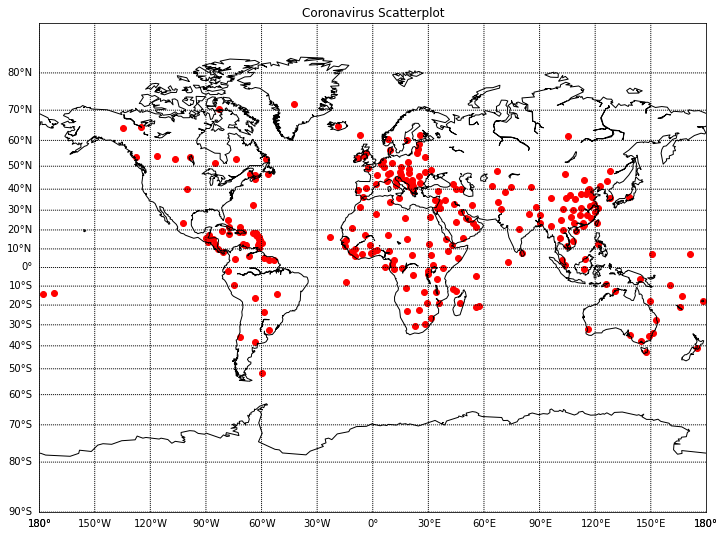

In [82]:
fig=plt.figure(figsize=(12,9))
m= Basemap(projection="mill", 
           llcrnrlat=-90,
           urcrnrlat=90,
           llcrnrlon=-180,
           urcrnrlon=180,
           resolution='c')

m.drawcoastlines()
m.drawparallels(np.arange(-90,90,10),labels=[True, False, False, False])
m.drawmeridians(np.arange(-180,180,30), labels=([0,0,0,1]))


for index,row in data_set.iterrows():
  m.scatter(row["Long"],row["Lat"], latlon=True, c="red")
  

  


#data_set
plt.title("Coronavirus Scatterplot")
plt.show()


2. As clear from the map above, the denisty of the scatter points is highest European countries, essentially Italy, Germany, Greece and its surrounding states and central Europe especially Austria.

Another spot with high density of scatter points in the eastern part of Mainland China. 

There is also high density of spots in Western Africa, along the Atlantic coast. Countries such as Sierra Leone, Guinea, Ivory Coast and Ghana.


#### Question # 06

For this question, we will use the `COVID19_open_line_list.csv` file. 

1. Read the data file and examine the features
2. We will be working with these feature columns: `age, sex, symptoms, city, province, lives_in_Wuhan, and travel_history_location`.
3. Since these are textual values, you need to encode them to integers (maintain an encoding dictionary as well).
    * For example in `symptoms` column, you might assign fever -> 1, pneumonia -> 2, headache -> 3, etc.
    * There are several multiple symptoms as well for a single row, for those you can just sum the assigned integers. For example a row might list these symptons: fever, headache, since fever -> 1 and headache -> 3, you can replace fever, headache with 1+3 = 4 and so on. Start the integer encoding from 1 so that when summing the numbers, you donot get the same number back (e.g. 0+3 = 3).
    * You can do the same for other columns, just to avoid ambiguity, you can encode each column differently. 
    * For example, for the `symptoms` column, you starting assigning numbers from 1, let's say there were 4 symptoms, so the numbers would range from 1 - 4. For the next column, you can use numbers from 5 and so on. You are free to encode as you want. 
    * For ease, you can also use sklearn's LabelEncoder.
4. Once you have integer coded the entire dataset (7 columns), you can compute the correlation between city (let city column be `y` for this case) and every other column.
5. Pick the most 2 correlated fields (using the absolute value of correlations) and make `X`.
6. Use MinMaxScaler to scale X. Note that this will output a `np.array`. Make it a DataFrame again and rename the columns appropriately.
7. Print the head (5 rows) and tail (5 rows) of this dataframe.

TOLD BY THE PROFESSOR TO LEAVE